SeifEldin Abdelhamid 

CS 251/2: Data Analysis and Visualization

Fall 2024

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 6 | Supervised Learning

## Task 1: K Nearest Neighbors (KNN) Classifier

To start off the project, you will implement the **KNN classifier**, a bedrock, highly-versatile, nonparametric (i.e. *memory-based*) supervised learning algorithm. You will test out and experiment with KNN on a **multi-class spiral 2D dataset**.

### 1a. Load and visualize spiral data

1. Below, load in both spiral datasets 1 (`spiral_train_1.csv`, `spiral_val_1.csv`) and 2 (`spiral_train_2.csv`, `spiral_val_2.csv`). Each training set has 4,000 samples and each validation set has 1,200 samples (*there is no test set for this development dataset*).
2. Create a 2x2 grid plot showing the train and validation data side-by-side in each version of the dataset.
    - Be sure to label your subplots with informative titles (which dataset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).
3. Convert your datasets from pandas to ndarray format.
4. For this dataset, the labels are a column in the CSV files. Before moving on, create separate arrays to store the training and validation labels. Remove the labels from your train and test dataset arrays (i.e. they should be `(N, 2)`).

#### Format of spiral data

- Column 1: x coordinate of a 2D point (on a spiral).
- Column 2: y coordinate of a 2D point (on a spiral).
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1, 2, 3]

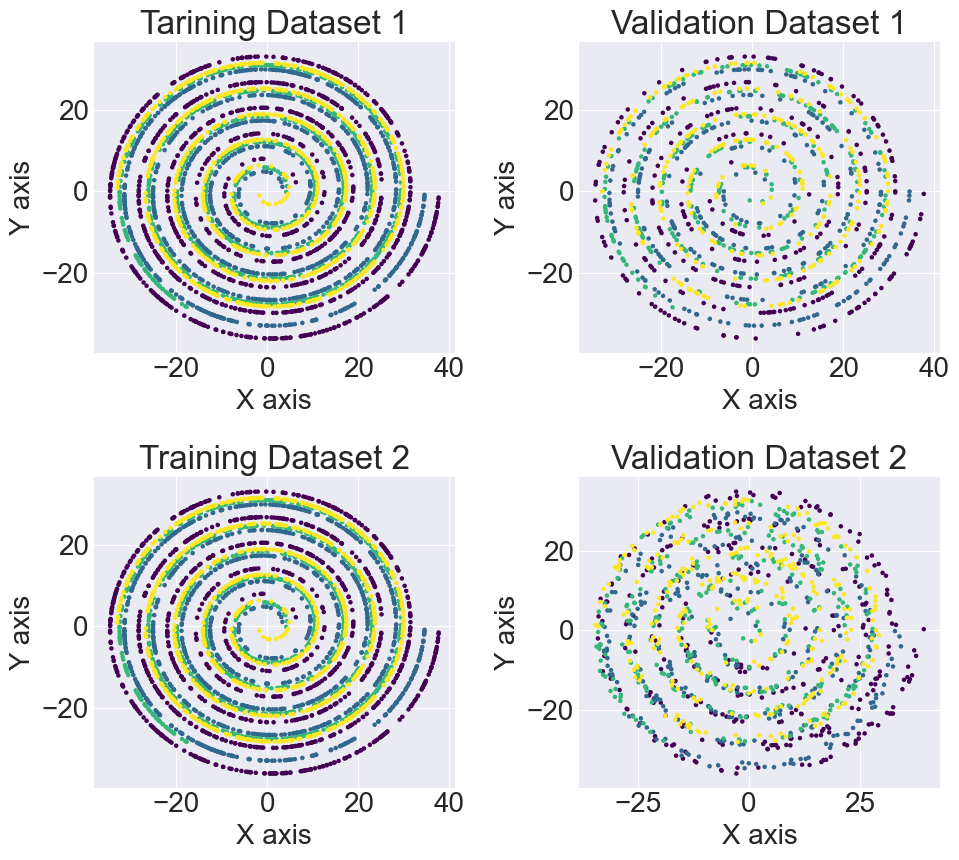

Spiral 1 train (4000, 2), classes (4000,)
Spiral 1 validation (1200, 2), classes (1200,)
Spiral 2 train (4000, 2), classes (4000,)
Spiral 2 validation (1200, 2), classes (1200,)

Spiral 1 train data in ndarray format? True
Spiral 1 train class in ndarray format? True
Spiral 1 validation data in ndarray format? True
Spiral 1 validation class in ndarray format? True
Spiral 2 train data in ndarray format? True
Spiral 2 train class in ndarray format? True
Spiral 2 validation data in ndarray format? True
Spiral 2 validation class in ndarray format? True


In [143]:
spiral_1_train_dataset = pd.read_csv('data/spiral_train_1.csv'); spiral_1_val_dataset = pd.read_csv('data/spiral_val_1.csv')
spiral_2_train_dataset = pd.read_csv('data/spiral_train_2.csv'); spiral_2_val_dataset = pd.read_csv('data/spiral_val_2.csv')

spiral_1_train = spiral_1_train_dataset.iloc[:, :2].values
spiral_1_train_y = spiral_1_train_dataset.iloc[:, 2].values
spiral_1_val = spiral_1_val_dataset.iloc[:, :2].values
spiral_1_val_y = spiral_1_val_dataset.iloc[:, 2].values

spiral_2_train = spiral_2_train_dataset.iloc[:, :2].values
spiral_2_train_y = spiral_2_train_dataset.iloc[:, 2].values
spiral_2_val = spiral_2_val_dataset.iloc[:, :2].values
spiral_2_val_y = spiral_2_val_dataset.iloc[:, 2].values


figs, ax = plt.subplots(2, 2, figsize=(10, 9))

ax[0, 0].scatter(spiral_1_train[:, 0], spiral_1_train[:, 1], c=spiral_1_train_y, cmap='viridis', s=5)
ax[0, 0].set_title('Tarining Dataset 1')
ax[0, 0].set_xlabel('X axis')
ax[0, 0].set_ylabel('Y axis')

ax[0, 1].scatter(spiral_1_val[:, 0], spiral_1_val[:, 1], c=spiral_1_val_y, cmap='viridis', s=5)
ax[0, 1].set_title('Validation Dataset 1')
ax[0, 1].set_xlabel('X axis')
ax[0, 1].set_ylabel('Y axis')

ax[1, 0].scatter(spiral_2_train[:, 0], spiral_2_train[:, 1], c=spiral_2_train_y, cmap='viridis', s=5)
ax[1, 0].set_title('Training Dataset 2')
ax[1, 0].set_xlabel('X axis')
ax[1, 0].set_ylabel('Y axis')

ax[1, 1].scatter(spiral_2_val[:, 0], spiral_2_val[:, 1], c=spiral_2_val_y, cmap='viridis', s=5)
ax[1, 1].set_title('Validation Dataset 2')
ax[1, 1].set_xlabel('X axis')
ax[1, 1].set_ylabel('Y axis')

plt.tight_layout()
plt.show()



print(f'Spiral 1 train {spiral_1_train.shape}, classes {spiral_1_train_y.shape}')
print(f'Spiral 1 validation {spiral_1_val.shape}, classes {spiral_1_val_y.shape}')
print(f'Spiral 2 train {spiral_2_train.shape}, classes {spiral_2_train_y.shape}')
print(f'Spiral 2 validation {spiral_2_val.shape}, classes {spiral_2_val_y.shape}')
print()

print(f'Spiral 1 train data in ndarray format? {isinstance(spiral_1_train, np.ndarray)}')
print(f'Spiral 1 train class in ndarray format? {isinstance(spiral_1_train_y, np.ndarray)}')
print(f'Spiral 1 validation data in ndarray format? {isinstance(spiral_1_val, np.ndarray)}')
print(f'Spiral 1 validation class in ndarray format? {isinstance(spiral_1_val_y, np.ndarray)}')
print(f'Spiral 2 train data in ndarray format? {isinstance(spiral_2_train, np.ndarray)}')
print(f'Spiral 2 train class in ndarray format? {isinstance(spiral_2_train_y, np.ndarray)}')
print(f'Spiral 2 validation data in ndarray format? {isinstance(spiral_2_val, np.ndarray)}')
print(f'Spiral 2 validation class in ndarray format? {isinstance(spiral_2_val_y, np.ndarray)}')

### 1b. Implement KNN


Implement the following methods of `Classifier` in `classifier.py`, which will be the parent class to the `KNN` classifier.
- Constructor
- `accuracy(y, y_pred)`: Compute percent correct given true data class labels `y` and algorithm predicted class labels `y_pred`. 

Implement the following methods of `KNN` in `knn.py`. 
- Constructor
- `train(data, y)`: Train the KNN classifier on the data `data`, where training samples have corresponding class labels in `y`.
- `predict(data, k)`: Use the trained KNN classifier to predict the class label of each test sample in `data`. Determine class by voting: find the closest `k` training exemplars (training samples) and the class is the majority vote of the classes of these training exemplars.

Test relevant methods using the test code below.

In [144]:
from knn import KNN

#### Test: Accuracy

In [145]:
np.random.seed(0)
test_y = np.random.randint(low=0, high=11, size=(50,))
test_y_pred = np.random.randint(low=0, high=11, size=(50,))

classifier = KNN(num_classes=0)
acc = classifier.accuracy(test_y, test_y_pred)
print(f'Test accuracy is {acc} and should be 0.06.')

Test accuracy is 0.06 and should be 0.06.


#### Test: 1-NN

In [146]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 1
spiral_1_y_pred = classifier.predict(spiral_1_train, k)
acc = classifier.accuracy(y=spiral_1_train_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=1 is {acc} and should be 1.0')

Your accuracy with K=1 is 1.0 and should be 1.0


#### Test 2-NN

*Note: The below test code assumes that you resolve voting ties with the class that has a lower index. There is a numpy function that you may feel inclined to use (or not!) that handles this automatically.*

In [147]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 2
spiral_1_y_pred = classifier.predict(spiral_1_val, k)
acc = classifier.accuracy(y=spiral_1_val_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=2 is {acc:.2f} and should be 0.88')

true_test_y = np.array([2., 2., 2., 2., 2., 3., 2., 2., 3., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 3., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 3., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 3., 2., 2., 2., 3., 3., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

print(f'The mismatches between your predicted class of validation samples with indices 750-900 and the expected values are\n{np.where(true_test_y != spiral_1_y_pred[750:900], 1, 0)}')
print('Seeing all 0s means everything seems to be working great!')

Your accuracy with K=2 is 0.88 and should be 0.88
The mismatches between your predicted class of validation samples with indices 750-900 and the expected values are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Seeing all 0s means everything seems to be working great!


### 1c. Questions

**Question 1:** Explain why in the above 1-NN test, the accuracy must be 100%.

Answer 1: Because each training point is its own closest neighbor. Definitely, this makes the accuracy 100% when k=1, because the data point doesn't move. Basically, it is measuring itself.

### 1d. Find the best `k`

- Below, "script" your `predict` method on both spiral datasets 1 and 2. Compute the accuracy on the respective test sets with many different values of `k`.
- Create two well-labeled plots, one for each spiral dataset, showing the accuracy for many different `k` values.

In [148]:
acc_1 = []
acc_2 = []

knn_1 = KNN(num_classes=len(np.unique(spiral_1_train_y)))
knn_2 = KNN(num_classes=len(np.unique(spiral_2_train_y)))

k_limit = 50
knn_1.train(spiral_1_train, spiral_1_train_y)
for k in range(1, k_limit + 1):
    predict_1 = knn_1.predict(spiral_1_val, k)
    acc_1.append(knn_1.accuracy(spiral_1_val_y, predict_1))

knn_2.train(spiral_2_train, spiral_2_train_y)
for k in range(1, k_limit + 1):
    predict_2 = knn_2.predict(spiral_2_val, k)
    acc_2.append(knn_2.accuracy(spiral_2_val_y, predict_2))

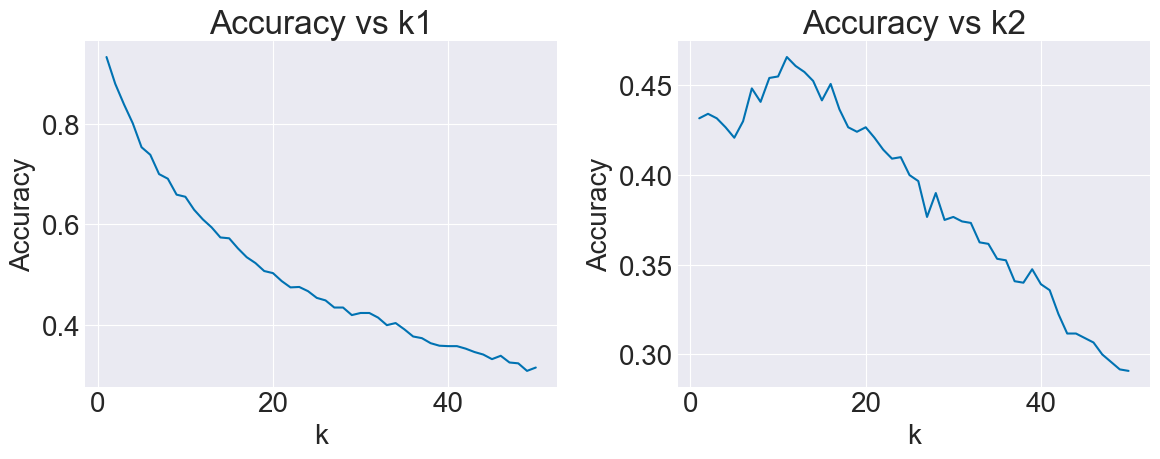

In [149]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, k_limit + 1), acc_1)
plt.title("Accuracy vs k1")
plt.xlabel("k")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(1, k_limit + 1), acc_2)
plt.title("Accuracy vs k2")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

### 1e. Questions

**Question 2:** What is the `k` that results in the highest accuracy on each spiral dataset?

**Question 3:** Why are the accuracies are so different across the datasets? (*Hint: look at the data*)

**Question 4:** Why are the best `k` values are so different across the datasets?

**Question 5:** Is it a good idea to always set `k` to one of these values when working with another dataset?

Answer 2: For dataset 1 the highest accuracy happens at k=1, for dataset 2 it happens at k=10

Answer 3: Spiral Dataset 1 has clear spirals, so it’s easier to classify with high accuracy at lower k and Spiral Dataset 2 has overlapping spirals, making classification harder and accuracy lower.

Answer 4:Spiral Dataset 1 works well with smaller k due to clear class boundaries, as I mentioned in my answer for question 3. Spiral Dataset 2 benefits from a larger k (k=10) to smooth noise and improve accuracy.

Answer 5: No, optimal k varies by dataset. Well-separated classes need smaller k, while noisy datasets need larger k.

### 1f. Visualize class boundaries

- Implement `plot_predictions` in `knn.py` to visualize how different regions of the (2D) dataspace would be classified. In this visualization, use four discrete colors to represent each of the classes. For example, if KNN would classify (x, y) = (10, 10) to spiral 2, you would color that region blue (for example). You will repeat this for lots of different regularly spaced x,y points to get a better picture of the regions that would be predicted to belong to different classes.
- For spiral dataset 1 and 2, plot the class boundaries for the k best value determined above.

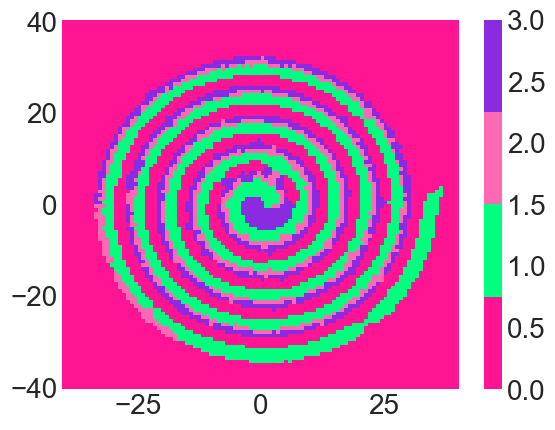

In [151]:
# Visualize KNN boundary 1
knn_1.plot_predictions(1, 100)

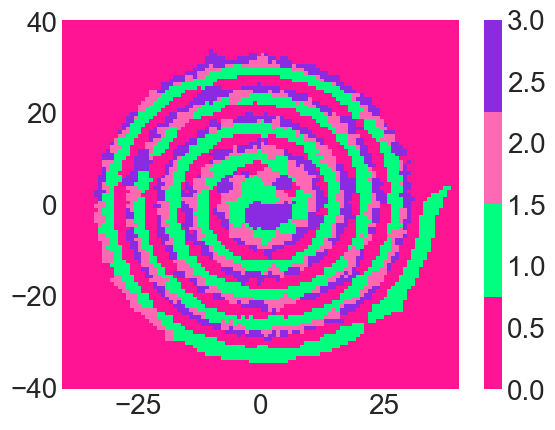

In [152]:
# Visualize KNN boundary 2
knn_2.plot_predictions(5, 100)

### 1g. Questions

**Question 6:** Why could visualizing the class boundaries be useful?

Answer 6: Class boundaries show that Spiral Dataset 1 is classified more accurately than Dataset 2.